In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 8

In [3]:
#Функция создает двумерный массив, заполненный нулями
def zeros(row_num, col_num):
    if row_num == 1:
        return [0 for i in range(col_num)]
    return [[0 for i in range(col_num)] for j in range(row_num)]

#Функция добавления элемента в массив
def append(x, el):
    new_x = [0 for i in range(len(x) + 1)]
    for i in range(len(x)):
        new_x[i] = x[i]
    new_x[-1] = el
    return new_x

In [4]:
#Функция считывания картинки из файла
def get_matrix(filename):
    with open(filename, "r") as f:
        lines = f.readlines()
        res = zeros(n, n)
        for i in range(len(lines)):
            tmp = []
            for s in list(lines[i]):
                if s == '\n':
                    continue
                if s == "*":
                    tmp = append(tmp, int(1))
                else:
                    tmp = append(tmp, -1)
            res[i] = tmp
        return res

In [5]:
#Функция отрисовки картинки
import numpy as np

def show_image(matrix):
    image = plt.imshow(matrix, cmap = 'Greys')
    ax = plt.gca()
    ax.set_xticks(np.arange(.5, 8.5, 1), minor = True)
    ax.set_yticks(np.arange(.5, 8.5, 1), minor = True)
    ax.grid(which = 'minor', color = 'k', linestyle = '-', linewidth = 2)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.show()

In [6]:
#Матрица весов
def change_weights(vectors, weights):
    res = zeros(n*n, n*n)
    for i in range (n*n):
        for j in range(n*n):
            if i!=j:
                s = 0
                for x in vectors:
                    s += x[i]*x[j]
                res[i][j] = weights[i][j] + s
    return res

In [7]:
#Функция активации
def activation(x):
    res = []
    for el  in x:
        if el >= 0:
            res = append(res, 1)
        else:
            res = append(res, -1)
    return res

In [8]:
#Функционирование сети
def get_image(y_test, w):
    state = zeros(1, n*n)
    for j in range(n*n):
        sum = 0
        for i in range(n*n):
            sum += w[i][j] * y_test[i]
        state[j] = sum
    return activation(state)

In [9]:
#Формирование матрицы из выходного вектора
def form_matrix(y):
    matrix = []
    for i in range(0, len(y), n):
        matrix = append(matrix, y[i:i+n])
    return matrix

In [10]:
#Преобразование матрицы в вектор
def flatten(matrix):
    flatten_array = []
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            flatten_array = append(flatten_array, matrix[i][j])
    return flatten_array

In [11]:
#Проверка массивов на равенство
def array_equal(arr1, arr2):
    for i in range(len(arr1)):
        if arr1[i] != arr2[i]:
            return False
    return True

In [12]:
images = ['img1.txt',
         'img2.txt',
         'img3.txt',
         'img4.txt']
image_vectors = []
matrices = []

img1.txt


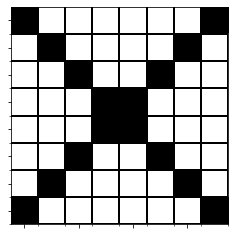

img2.txt


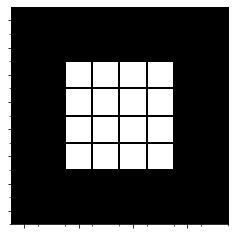

img3.txt


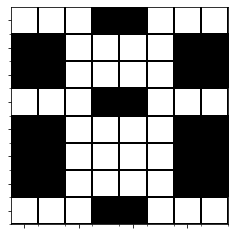

img4.txt


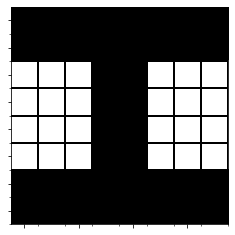

In [13]:
#Считываем картинки из файлов
for i in images:
    model = get_matrix(i)
    print(i[-8:])
    show_image(model)
    matrices = append(matrices, model)
    image_vectors = append(image_vectors, flatten(model))

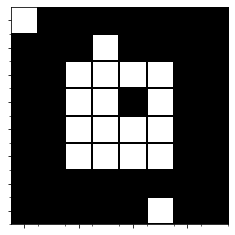

In [14]:
w = zeros(n*n, n*n)
w = change_weights(image_vectors, w)
test_filename = 'test2.txt'
y = get_matrix(test_filename)
show_image(y)
y_new = flatten(y)

In [15]:
#Создание копии одномерного вектора
def copy(x):
    y = [0 for i in range(len(x))]
    for i in range(len(x)):
        y[i] = x[i]
    return y

stop
Изображение восстановлено


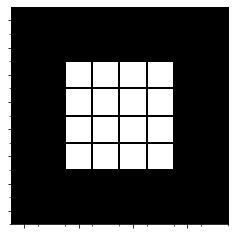

In [17]:
y_old = copy(y_new)
y_new = get_image(y_new, w)
matrix = form_matrix(y_new)

if array_equal(y_old, y_new):
    print('stop')
    find = False
    for x in image_vectors:
        if array_equal(y_new, x):
            find = True
            break
    if find:
        print('Изображение восстановлено')
    else:
        print('Не удалось восстановить изображение')
show_image(matrix)

In [18]:
# Нахождение весовых коэффициентов синапсов для сети Хеминга
def heming_change_weights(vectors, w):
    res = zeros(n*n, len(vectors))
    for i in range(n*n):
        for j in range(len(vectors)):
            res[i][j] = w[i][j] + float(vectors[j][i]) / 2
    return res

In [19]:
#Инициализация нейронов 1-го слоя
def init_layer(vector, w):
    y_prev = zeros(1, len(image_vectors))
    T = [n*n/2 for i in range(len(image_vectors))] 
    for i in range(len(y_prev)):
        for j in range(n*n):
            y_prev[i] += w[j][i] * vector[j]
        y_prev[i] += T[i]
    return y_prev

In [20]:
#Запуск сети Хеминга на новом изображении
def heming_get_image(y_test, eps):
    state = zeros(1, len(y_test))
    for i in range(len(y_test)):
        sum = y_test[i]
        for j in range(len(y_test)):
            if i != j:
                sum -= eps * y_test[j]
        state[i] = sum
    
    for i in range(len(state)):
        if state[i] < 0:
            state[i] = 0
    return state

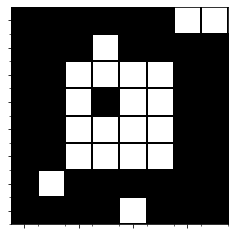

In [21]:
w = zeros(n*n, len(image_vectors))
w = heming_change_weights(image_vectors, w)
test_filename = 'test1.txt'
y = get_matrix(test_filename)
show_image(y)
y_new = init_layer(flatten(y), w)
eps = 0.4

In [23]:
y_old = copy(y_new)
y_new = heming_get_image(y_new, eps)

if array_equal(y_old, y_new):
    print('stop')
    count = 0
    for x in y_new:
        if x > 0:
            count += 1
    if count == 1:
        print('Изображение восстановлено')
    else:
        print('Не удалось восстановить изображение')
print(y_new)

stop
Изображение восстановлено
[0, 20.4, 0, 0]
